This notebook is mostly the same as the other one, but it is something I felt compelled to make as the results vary wildly in comparison to the models and vizualisations that are present in the first notebook. 
The thing that bugged me the most about all of it, was the difference in performance of each model, and how when formatting the numbers this way they perform a lot better. 
Another reason why I thought this might actually be the way it was meant to be formatted was because of inconsistencies in the actual formatting.
I'll give some examples:

- The dataset shows a significant number of instances that are very low in value of income (low at least in comparison to income values in the billions that are present in most rows):

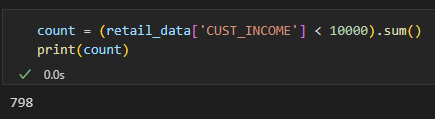


- Inconsistent formatting

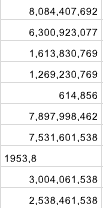 

This indeed occurs in many places. How exactly are we supposed to format 1953,8? Is it 1953.8 or is it 19538, because that's the way it's formatted in other numbers. 
It has occured to me that maybe some people's earnings are collected in different currencies, so that's why a certain person can earn billions and another earns just hundreds, but it is difficult to format that with no other information on the data. We can make assumptions, but we will most certainly make false ones.

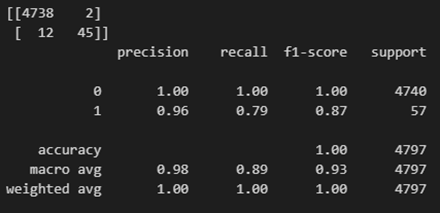

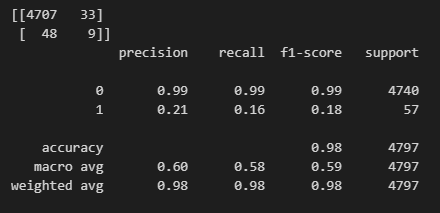

In [1]:
# The notebook was run using Python version 3.10.7
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score,  recall_score, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.metrics import Precision, Recall
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.covariance import EllipticEnvelope

from sklearn.ensemble import IsolationForest

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

Importing the data and checking for null values

In [26]:
retail_data = pd.read_csv("Retail data.csv", sep=';', header=0)

#The next two lines are the key difference, replacing ',' with '.', rather than what was done in the first notebook (replacing ',' with '')
retail_data['CUST_INCOME'] = retail_data['CUST_INCOME'].str.replace(',', '.').astype(float)
retail_data['CURRENT_BALANCE_EUR'] = retail_data['CURRENT_BALANCE_EUR'].str.replace(',', '.').astype(float)

print(retail_data.isnull().sum())

Cocunut                       0
Mortgage_YN                   0
AGE_AT_ORIGINATION        23677
AGE                           0
YEARS_WITH_BANK               0
MARTIAL_STATUS                0
EDUCATION                     0
EMPLOYMENT                    0
GENDER                        0
CUST_INCOME                   0
CURRENT_ADDRESS_DATE          0
CURRENT_JOB_DATE              0
CURRENT_WITH_BANK_DATE        0
CURRENT_BALANCE_EUR           0
dtype: int64


In [5]:
retail_data.head()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
0,1,Y,50.0,52,13,M,HGH,PVE,M,909.501308,1979-04-18,2010-01-01,2004-03-16,7648.350692
1,9,Y,48.0,49,11,M,HGH,SFE,M,288.461539,1999-12-16,2004-01-20,2005-11-07,30189.904920
2,11,Y,53.0,55,14,M,BCR,STE,M,1280.528692,2005-06-28,1990-09-01,2003-06-25,50553.174540
3,12,Y,64.0,66,10,M,BCR,OTH,F,620.959769,2000-12-22,9999-10-01,2006-12-21,15907.283380
4,18,Y,46.0,47,9,S,MAS,PVE,F,2239.853846,2009-08-01,2013-12-24,2007-08-07,27916.192620


In [6]:
for column in retail_data.columns:
    print("Column Name:", column)
    print("Info on the data: ", retail_data[column].describe())
    print("---------------------")

Column Name: Cocunut
Info on the data:  count    23983.000000
mean     39969.697786
std      22996.273034
min          1.000000
25%      20076.000000
50%      40066.000000
75%      59778.000000
max      79998.000000
Name: Cocunut, dtype: float64
---------------------
Column Name: Mortgage_YN
Info on the data:  count     23983
unique        2
top           N
freq      23677
Name: Mortgage_YN, dtype: object
---------------------
Column Name: AGE_AT_ORIGINATION
Info on the data:  count    306.000000
mean      41.333333
std        8.970992
min       22.000000
25%       35.000000
50%       40.000000
75%       47.750000
max       64.000000
Name: AGE_AT_ORIGINATION, dtype: float64
---------------------
Column Name: AGE
Info on the data:  count    23983.000000
mean        49.004378
std         12.976205
min         20.000000
25%         39.000000
50%         49.000000
75%         60.000000
max         92.000000
Name: AGE, dtype: float64
---------------------
Column Name: YEARS_WITH_BANK
Info o

Checking for the total number of occurances of '9999-10-01'. We must replace it as it will certainly cause conflicts when managing datetime values 

In [7]:
print((retail_data=='9999-10-01').sum().sum())

5965


Replacing the date with a future one, just so it works

In [27]:
retail_data['CURRENT_ADDRESS_DATE']  = retail_data['CURRENT_ADDRESS_DATE'].replace('9999-10-01', '2030-01-01')
retail_data['CURRENT_JOB_DATE']  = retail_data['CURRENT_JOB_DATE'].replace('9999-10-01', '2030-01-01')
retail_data['CURRENT_WITH_BANK_DATE']  = retail_data['CURRENT_WITH_BANK_DATE'].replace('9999-10-01', '2030-01-01')


retail_data['CURRENT_ADDRESS_DATE'] = pd.to_datetime(retail_data['CURRENT_ADDRESS_DATE'])
retail_data['CURRENT_JOB_DATE'] = pd.to_datetime(retail_data['CURRENT_JOB_DATE'])
retail_data['CURRENT_WITH_BANK_DATE'] = pd.to_datetime(retail_data['CURRENT_WITH_BANK_DATE'])

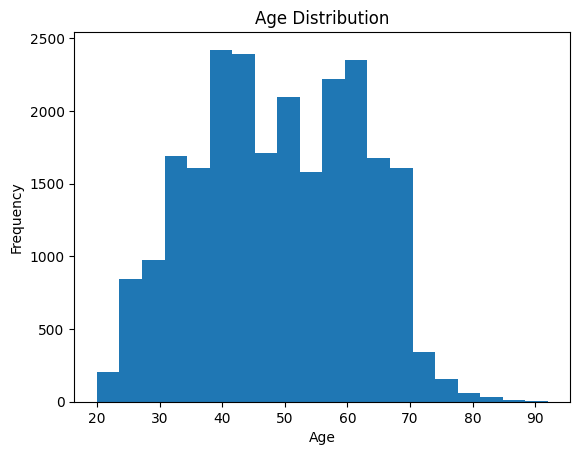

In [8]:
plt.hist(retail_data['AGE'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

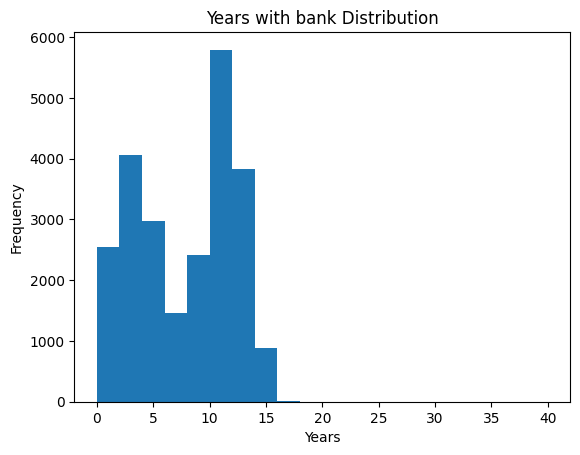

In [10]:
plt.hist(retail_data['YEARS_WITH_BANK'], bins=20)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Years with bank Distribution')
plt.show()

Long vs short term customers, earnings comparison

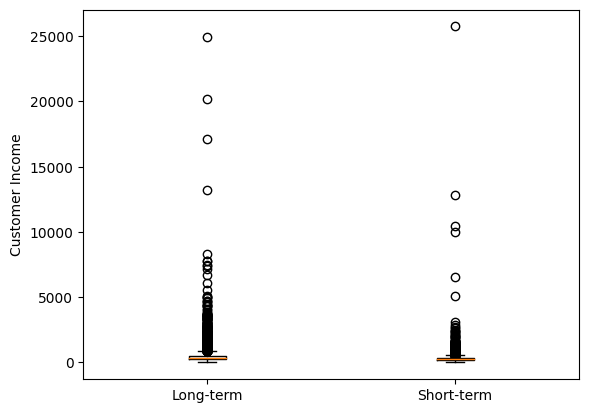

In [11]:
long_term = retail_data[retail_data['YEARS_WITH_BANK'] > 10]
short_term = retail_data[retail_data['YEARS_WITH_BANK'] < 5]

plt.boxplot([long_term['CUST_INCOME'], short_term['CUST_INCOME']])
plt.xticks([1, 2], ['Long-term', 'Short-term'])
plt.ylabel('Customer Income')
plt.show()

We can notice a seemingly large number of outliers in both categories, when formatting data like this

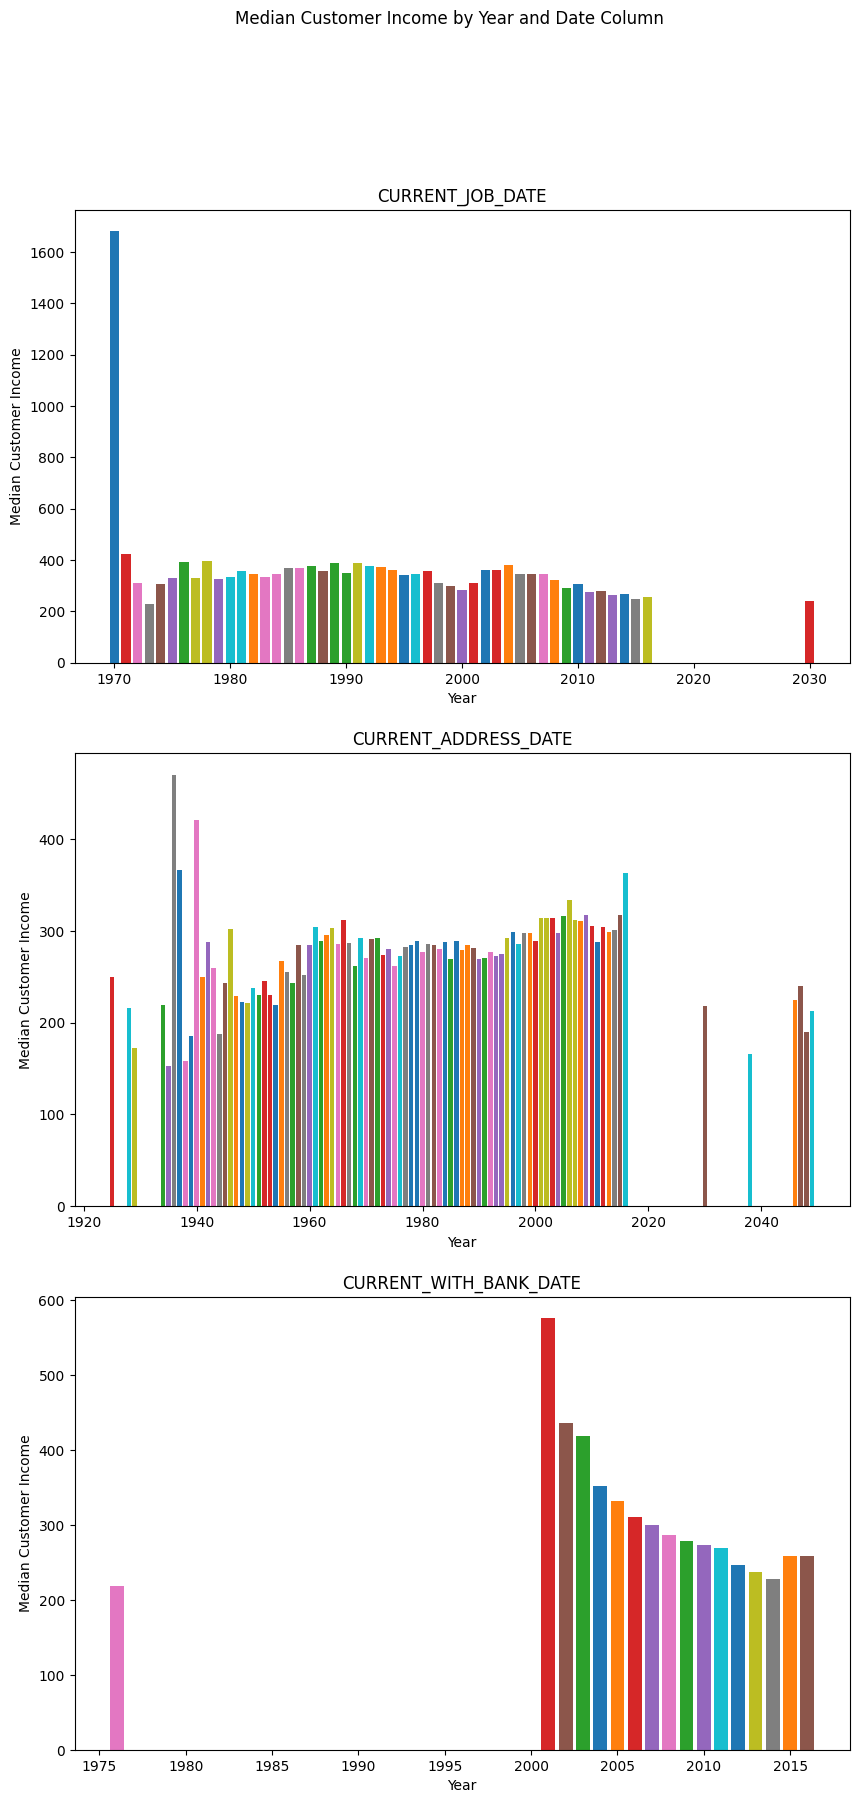

In [12]:
years_job = retail_data['CURRENT_JOB_DATE'].dt.year.unique()
years_address = retail_data['CURRENT_ADDRESS_DATE'].dt.year.unique()
years_bank = retail_data['CURRENT_WITH_BANK_DATE'].dt.year.unique()


fig, axs = plt.subplots(3, 1, figsize=(10, 20))
fig.suptitle('Median Customer Income by Year and Date Column')

for i, year in enumerate(years_job):
    df = retail_data[retail_data['CURRENT_JOB_DATE'].dt.year == year]
    median_balance = df['CUST_INCOME'].median()
    axs[0].bar(year, median_balance)
    
axs[0].set_title('CURRENT_JOB_DATE')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Median Customer Income')

for i, year in enumerate(years_address):
    df = retail_data[retail_data['CURRENT_ADDRESS_DATE'].dt.year == year]
    median_balance = df['CUST_INCOME'].median()
    axs[1].bar(year, median_balance)
    
axs[1].set_title('CURRENT_ADDRESS_DATE')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Median Customer Income')

for i, year in enumerate(years_bank):
    df = retail_data[retail_data['CURRENT_WITH_BANK_DATE'].dt.year == year]
    median_balance = df['CUST_INCOME'].median()
    axs[2].bar(year, median_balance)
    
axs[2].set_title('CURRENT_WITH_BANK_DATE')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Median Customer Income')

plt.show()

People who were with the bank longer, on average earn more, accross the board, other information is inconclusive.

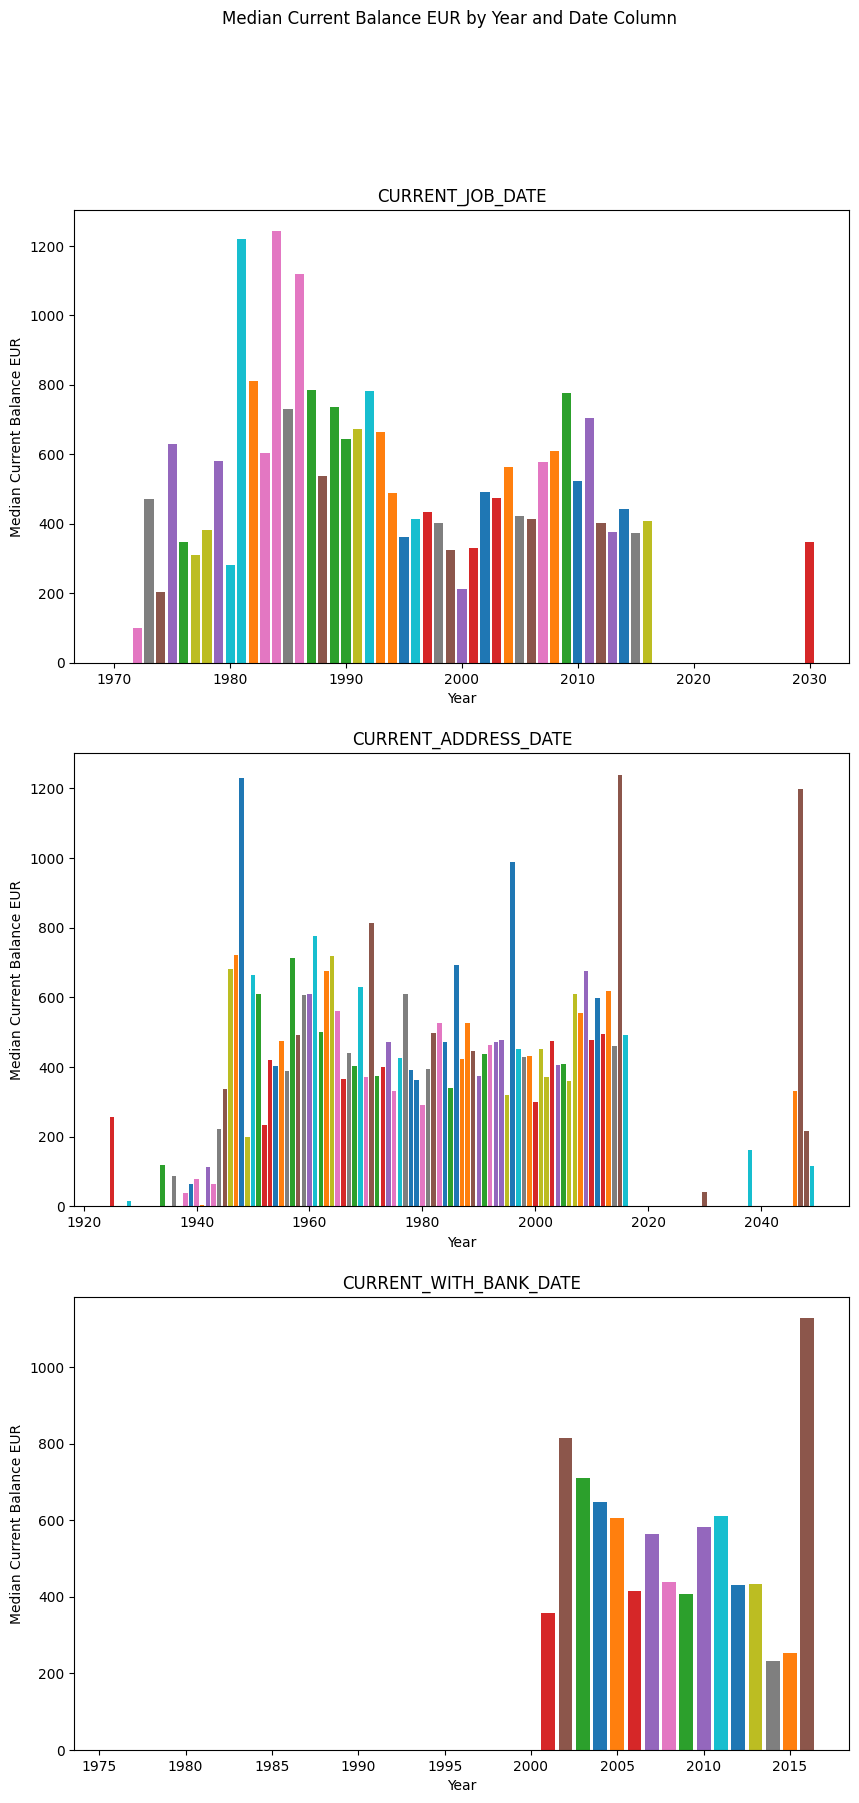

In [13]:
years_job = retail_data['CURRENT_JOB_DATE'].dt.year.unique()
years_address = retail_data['CURRENT_ADDRESS_DATE'].dt.year.unique()
years_bank = retail_data['CURRENT_WITH_BANK_DATE'].dt.year.unique()


fig, axs = plt.subplots(3, 1, figsize=(10, 20))
fig.suptitle('Median Current Balance EUR by Year and Date Column')

for i, year in enumerate(years_job):
    df = retail_data[retail_data['CURRENT_JOB_DATE'].dt.year == year]
    median_balance = df['CURRENT_BALANCE_EUR'].median()
    axs[0].bar(year, median_balance)
    
axs[0].set_title('CURRENT_JOB_DATE')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Median Current Balance EUR')

for i, year in enumerate(years_address):
    df = retail_data[retail_data['CURRENT_ADDRESS_DATE'].dt.year == year]
    median_balance = df['CURRENT_BALANCE_EUR'].median()
    axs[1].bar(year, median_balance)
    
axs[1].set_title('CURRENT_ADDRESS_DATE')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Median Current Balance EUR')

for i, year in enumerate(years_bank):
    df = retail_data[retail_data['CURRENT_WITH_BANK_DATE'].dt.year == year]
    median_balance = df['CURRENT_BALANCE_EUR'].median()
    axs[2].bar(year, median_balance)
    
axs[2].set_title('CURRENT_WITH_BANK_DATE')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Median Current Balance EUR')

plt.show()

There are some people who are living in the future, literally, as they have their residence date set to somewhere beyond the year 2040.

A new feature - Employment stability

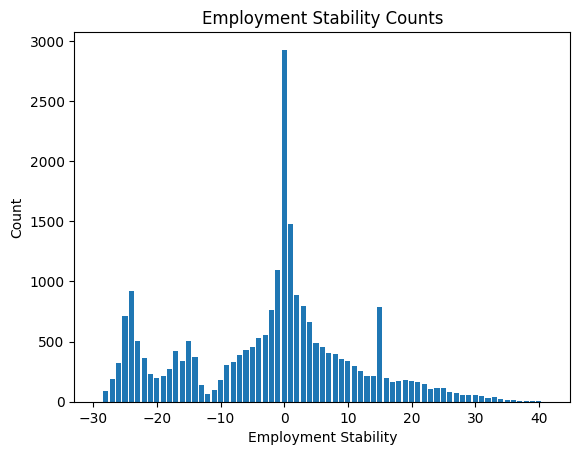

In [14]:
retail_data['EMPLOYMENT_STABILITY'] = round((pd.to_datetime(retail_data['CURRENT_WITH_BANK_DATE']) - pd.to_datetime(retail_data['CURRENT_JOB_DATE'])).dt.days / 365)

stability_counts = retail_data['EMPLOYMENT_STABILITY'].value_counts()
plt.bar(stability_counts.index, stability_counts.values)
plt.title('Employment Stability Counts')
plt.xlabel('Employment Stability')
plt.ylabel('Count')
plt.show()

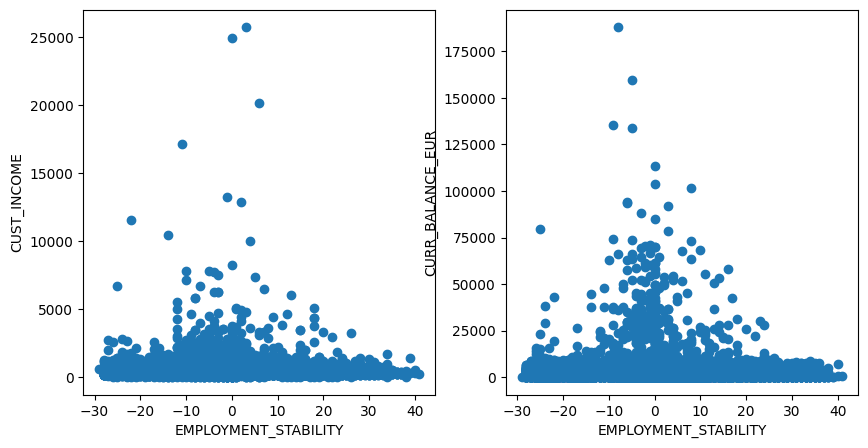

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.scatter(retail_data['EMPLOYMENT_STABILITY'], retail_data['CUST_INCOME'])
ax1.set_xlabel('EMPLOYMENT_STABILITY')
ax1.set_ylabel('CUST_INCOME')

ax2.scatter(retail_data['EMPLOYMENT_STABILITY'], retail_data['CURRENT_BALANCE_EUR'])
ax2.set_xlabel('EMPLOYMENT_STABILITY')
ax2.set_ylabel('CURR_BALANCE_EUR')

plt.show()

C:\Users\vojislav\AppData\Local\Temp\ipykernel_3052\676653449.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_data = retail_data.groupby('GENDER').median()[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]
C:\Users\vojislav\AppData\Local\Temp\ipykernel_3052\676653449.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  marital_data = retail_data.groupby('MARTIAL_STATUS').median()[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]
C:\Users\vojislav\AppData\Local\Temp\ipykernel_3052\676653449.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeri

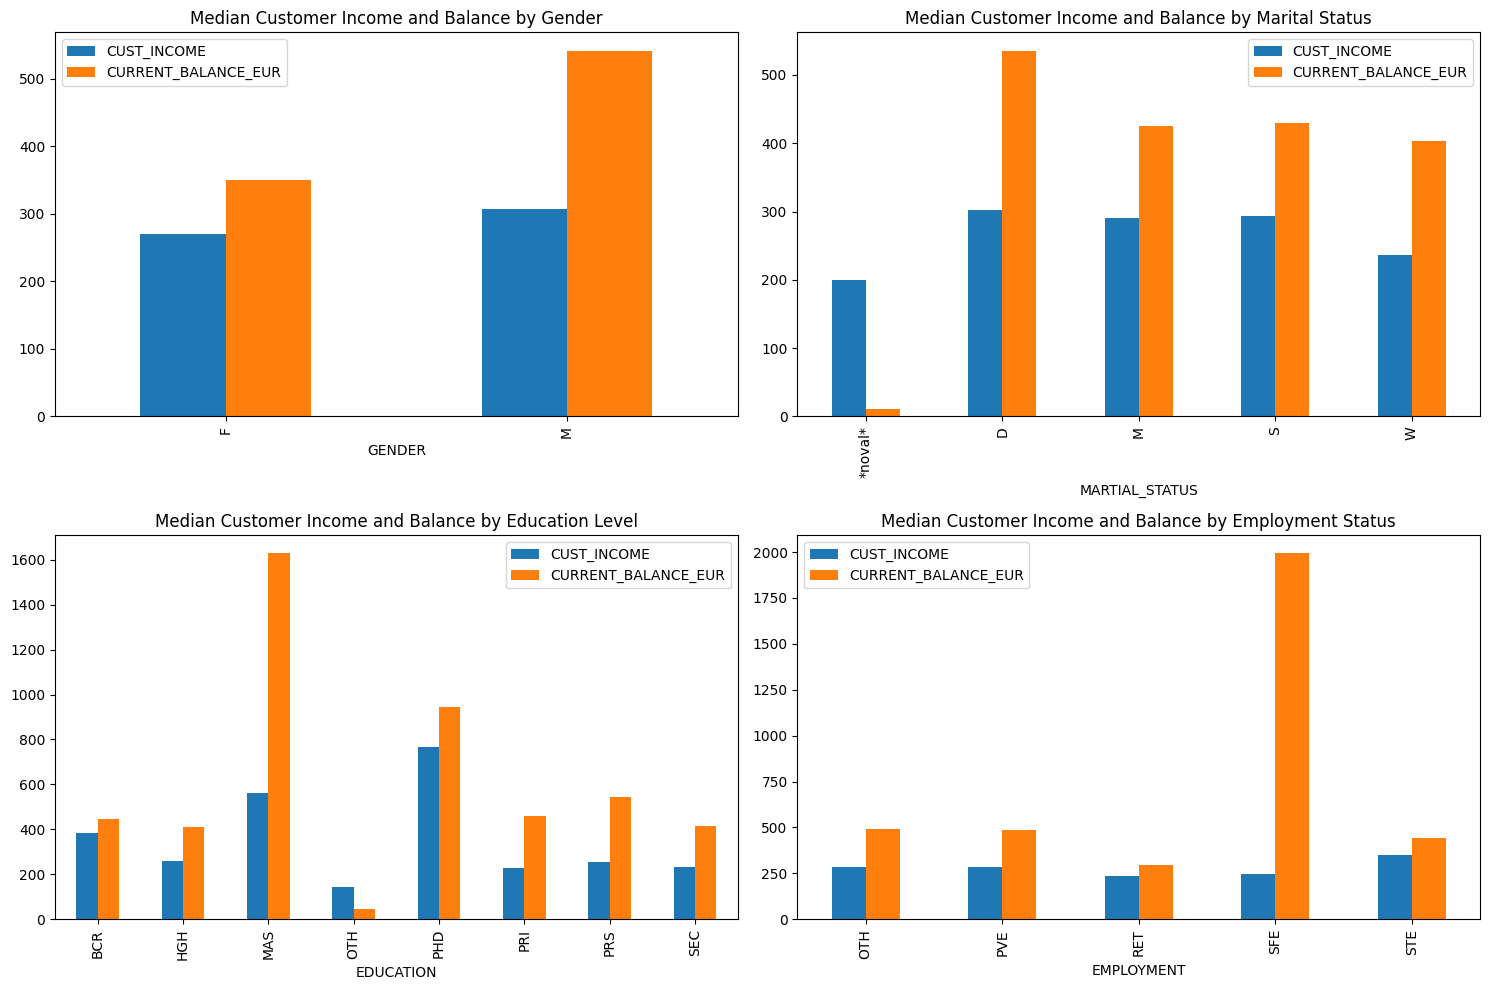

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

gender_data = retail_data.groupby('GENDER').median()[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]
gender_data.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Median Customer Income and Balance by Gender')


marital_data = retail_data.groupby('MARTIAL_STATUS').median()[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]
marital_data.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Median Customer Income and Balance by Marital Status')


education_data = retail_data.groupby('EDUCATION').median()[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]
education_data.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Median Customer Income and Balance by Education Level')
plt.xticks(rotation=45)


employment_data = retail_data.groupby('EMPLOYMENT').median()[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]
employment_data.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Median Customer Income and Balance by Employment Status')

plt.tight_layout()
fig.savefig('Median customer income by different categories.jpeg')
plt.show()

C:\Users\vojislav\AppData\Local\Temp\ipykernel_3052\1513428981.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = retail_data.groupby(['GENDER', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT']).median().reset_index()


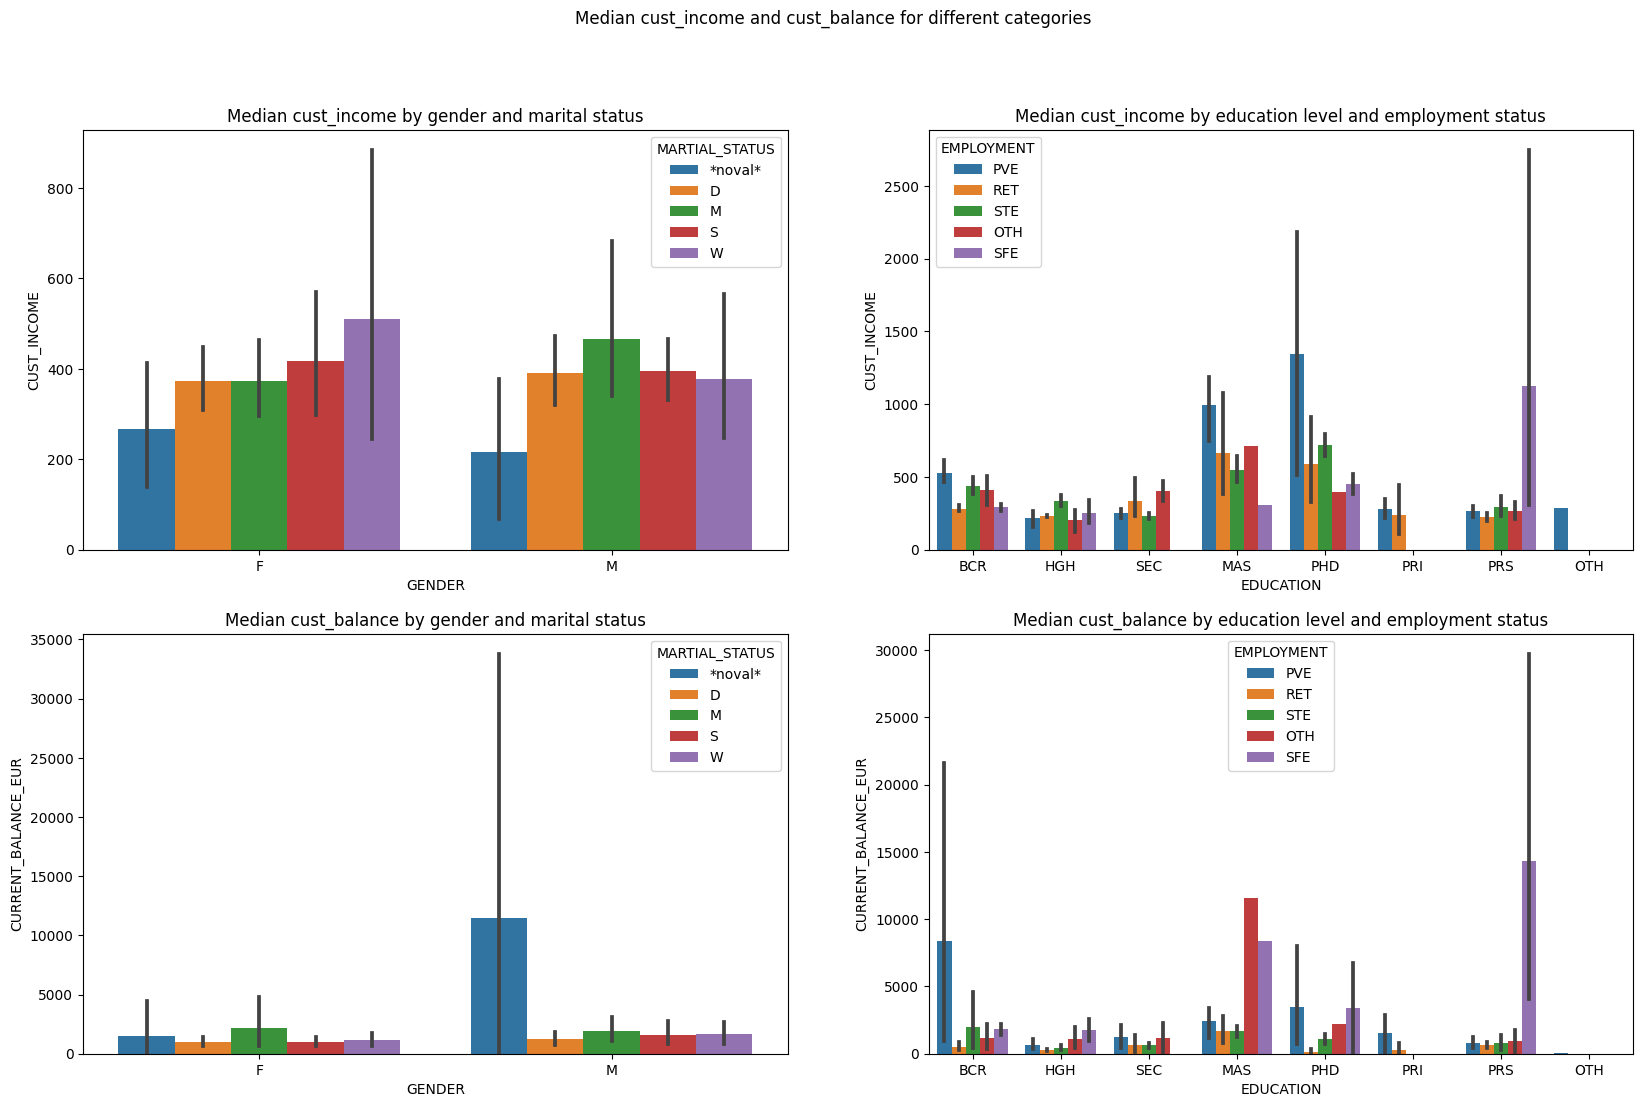

In [17]:
grouped_data = retail_data.groupby(['GENDER', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT']).median().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

sns.barplot(x='GENDER', y='CUST_INCOME', hue='MARTIAL_STATUS', data=grouped_data, ax=axes[0, 0])
sns.barplot(x='EDUCATION', y='CUST_INCOME', hue='EMPLOYMENT', data=grouped_data, ax=axes[0, 1])

sns.barplot(x='GENDER', y='CURRENT_BALANCE_EUR', hue='MARTIAL_STATUS', data=grouped_data, ax=axes[1, 0])
sns.barplot(x='EDUCATION', y='CURRENT_BALANCE_EUR', hue='EMPLOYMENT', data=grouped_data, ax=axes[1, 1])

axes[0, 0].set_title('Median cust_income by gender and marital status')
axes[0, 1].set_title('Median cust_income by education level and employment status')
axes[1, 0].set_title('Median cust_balance by gender and marital status')
axes[1, 1].set_title('Median cust_balance by education level and employment status')

fig.suptitle('Median cust_income and cust_balance for different categories')
fig.savefig('my_plot.jpeg')
plt.show()

In [18]:
mortgage_ages = retail_data.groupby(['Mortgage_YN', 'EDUCATION'])['AGE'].mean()
mortgage_ages = mortgage_ages.reset_index()
mortgage_ages = mortgage_ages.pivot(index='EDUCATION', columns='Mortgage_YN', values='AGE')
print(mortgage_ages)

Mortgage_YN          N          Y
EDUCATION                        
BCR          49.105744  43.117647
HGH          49.019826  42.757576
MAS          44.522989  40.000000
OTH          54.500000        NaN
PHD          51.943925  47.500000
PRI          54.000000        NaN
PRS          47.694754  37.250000
SEC          54.417476  41.500000


Income and Balance distributions

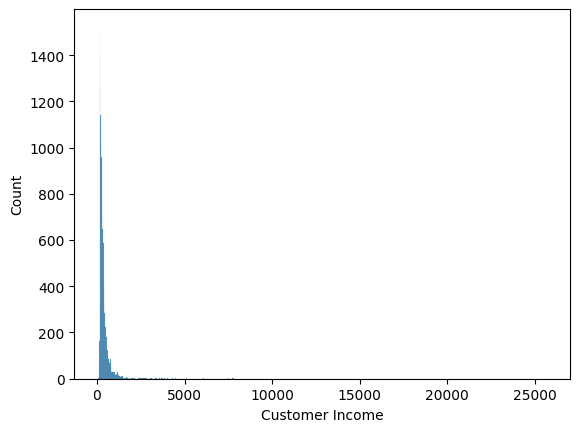

In [19]:
sns.histplot(retail_data['CUST_INCOME'], kde=False)
plt.xlabel('Customer Income')
plt.ylabel('Count')
plt.show()

The data is mostly centered but there is a value in the 25 thousand territory

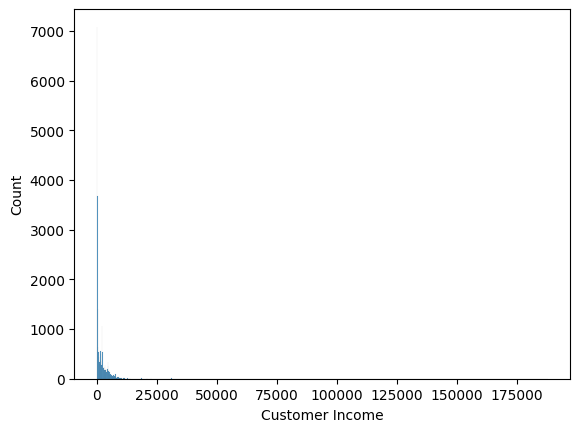

In [15]:
sns.histplot(retail_data['CURRENT_BALANCE_EUR'], kde=False)
plt.xlabel('Customer Income')
plt.ylabel('Count')
plt.show()

Same story here, just 175 thousand territory

In [20]:
print(retail_data.shape)
print(retail_data.describe())
print(retail_data.info())

(23983, 15)
            Cocunut  AGE_AT_ORIGINATION           AGE  YEARS_WITH_BANK  \
count  23983.000000          306.000000  23983.000000     23983.000000   
mean   39969.697786           41.333333     49.004378         7.370804   
std    22996.273034            8.970992     12.976205         4.320568   
min        1.000000           22.000000     20.000000         0.000000   
25%    20076.000000           35.000000     39.000000         3.000000   
50%    40066.000000           40.000000     49.000000         9.000000   
75%    59778.000000           47.750000     60.000000        11.000000   
max    79998.000000           64.000000     92.000000        40.000000   

        CUST_INCOME  CURRENT_BALANCE_EUR  EMPLOYMENT_STABILITY  
count  23983.000000         23983.000000          23983.000000  
mean     381.512485          1960.854473             -1.975274  
std      486.255438          5023.234656             13.303217  
min        0.000000             0.000000            -29.00000

Distribution of median customer income and current balance by mortgage status

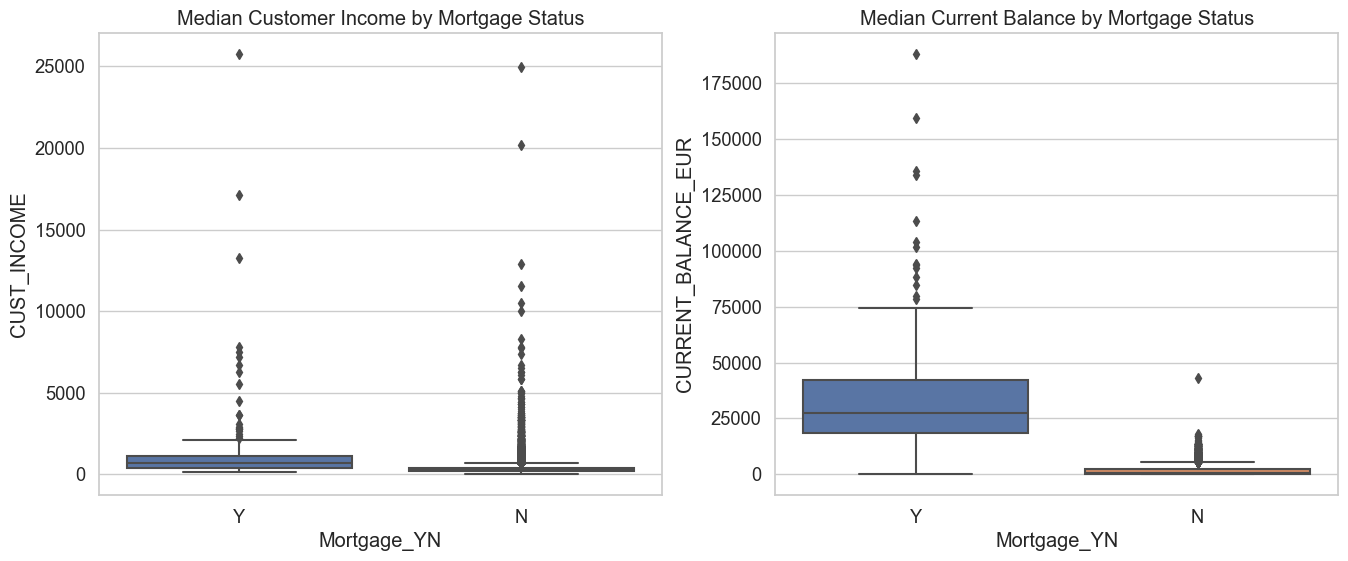

In [21]:
sns.set(style="whitegrid", font_scale=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x="Mortgage_YN", y="CUST_INCOME", data=retail_data, ax=ax[0])
ax[0].set_title("Median Customer Income by Mortgage Status")

sns.boxplot(x="Mortgage_YN", y="CURRENT_BALANCE_EUR", data=retail_data, ax=ax[1])
ax[1].set_title("Median Current Balance by Mortgage Status")

plt.show()

# Adjusting for the ML models

In [28]:
retail_data['EMPLOYMENT_STABILITY'] = (pd.to_datetime(retail_data['CURRENT_WITH_BANK_DATE']) - pd.to_datetime(retail_data['CURRENT_JOB_DATE'])).dt.days / 365
retail_data.drop(['Cocunut'], axis=1, inplace=True)
retail_data = pd.get_dummies(retail_data, columns=['GENDER', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT'])
retail_data['Mortgage_YN'] = retail_data['Mortgage_YN'].replace({'Y': 1, 'N': 0})

We must drop AGE_AT_ORIGINATION because it's almost like a data leak, since only the customers who have a mortgage have a number assigned

In [29]:
X = retail_data.drop(columns=['Mortgage_YN', 'CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE', 'CURRENT_WITH_BANK_DATE', 'AGE_AT_ORIGINATION'], axis=1)
y = retail_data['Mortgage_YN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

C:\Users\vojislav\AppData\Local\Temp\ipykernel_3052\1258422958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = retail_data.corr()


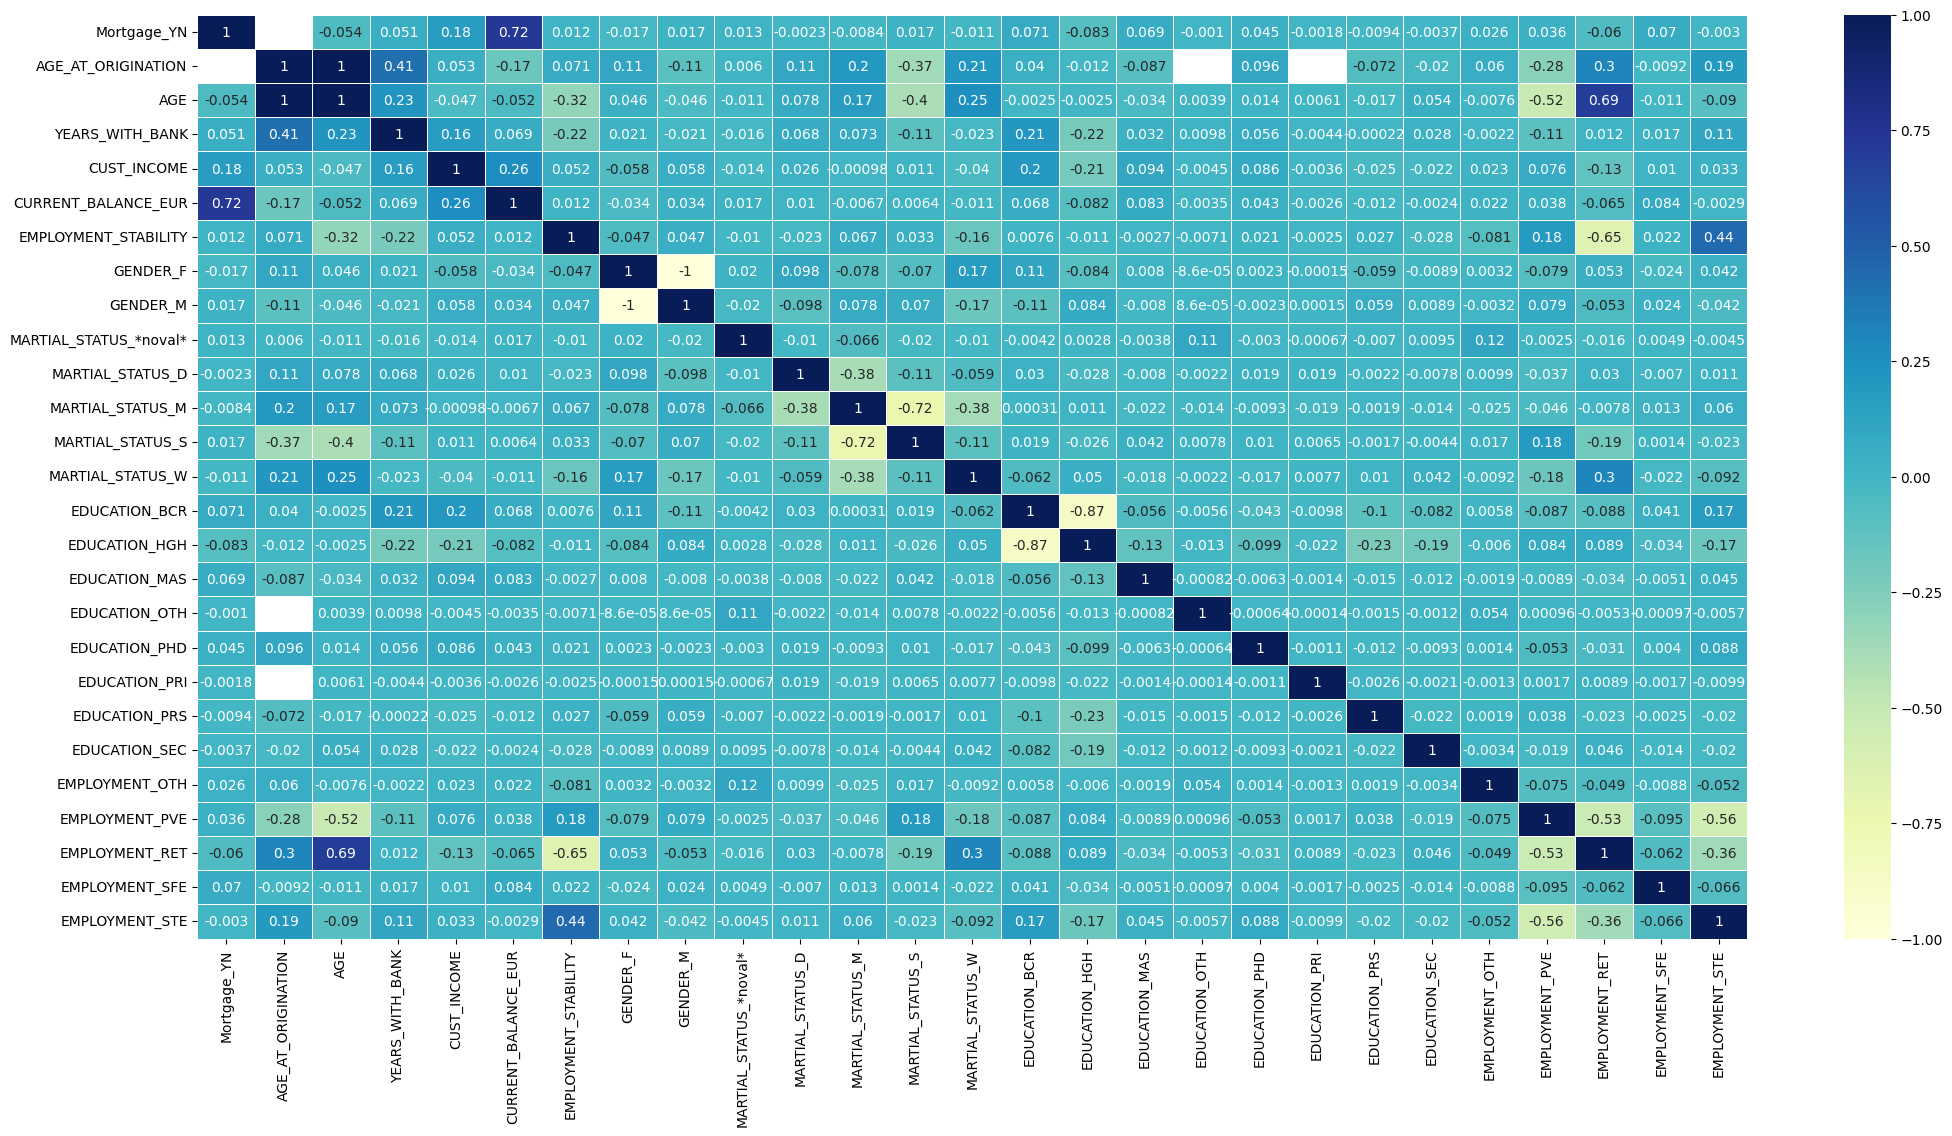

In [23]:
corr = retail_data.corr()

fix, ax = plt.subplots(figsize=(25,12))
sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=0.5)

plt.show()

Correlation matrices always bring interesting information to the table. 
Some notable examples of such an occurance are:
- People with higher income and especially balance are more likely to have mortgages
- Age is positively correlated with retirement rate, the "Widowed" marital status, customer income and negatively correlated with the "Single" marital status, I guess this would be obvious
- Customers with bachelors degrees have a higher income 


Clustering

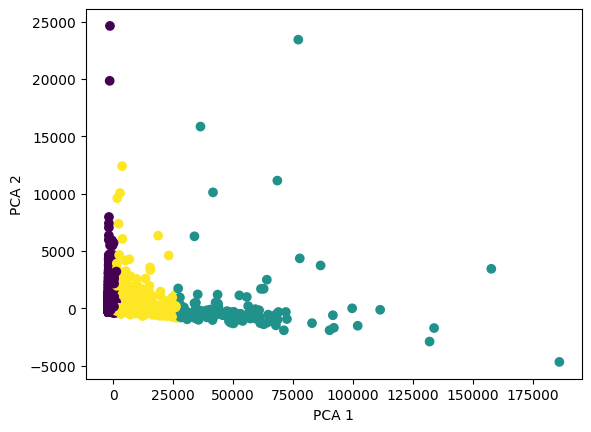

In [51]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = kmeans.labels_
retail_data['cluster'] = labels

pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

gb = GradientBoostingClassifier(random_state=47)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_f1 = f1_score(y_test, gb_pred)
print("Gradient Boosting f1:", gb_f1)

svm = SVC(random_state=47)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_f1 = f1_score(y_test, svm_pred)
print("SVM f1:", svm_f1)

Gradient Boosting f1: 0.8971962616822429
SVM f1: 0.8846153846153846


Logistic regression

In [52]:
model = LogisticRegression(max_iter = 170, random_state=47)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4740
           1       0.94      0.84      0.89        57

    accuracy                           1.00      4797
   macro avg       0.97      0.92      0.94      4797
weighted avg       1.00      1.00      1.00      4797

[[4737    3]
 [   9   48]]


A very precise and overall successful model.

Decision Tree Classifier

In [28]:
clf = DecisionTreeClassifier(max_depth = 3, min_samples_split = 1, random_state=47)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4740
           1       1.00      0.84      0.91        57

    accuracy                           1.00      4797
   macro avg       1.00      0.92      0.96      4797
weighted avg       1.00      1.00      1.00      4797

[[4740    0]
 [   9   48]]


Solid results as well, though this one cannot be used on unlabeled data.

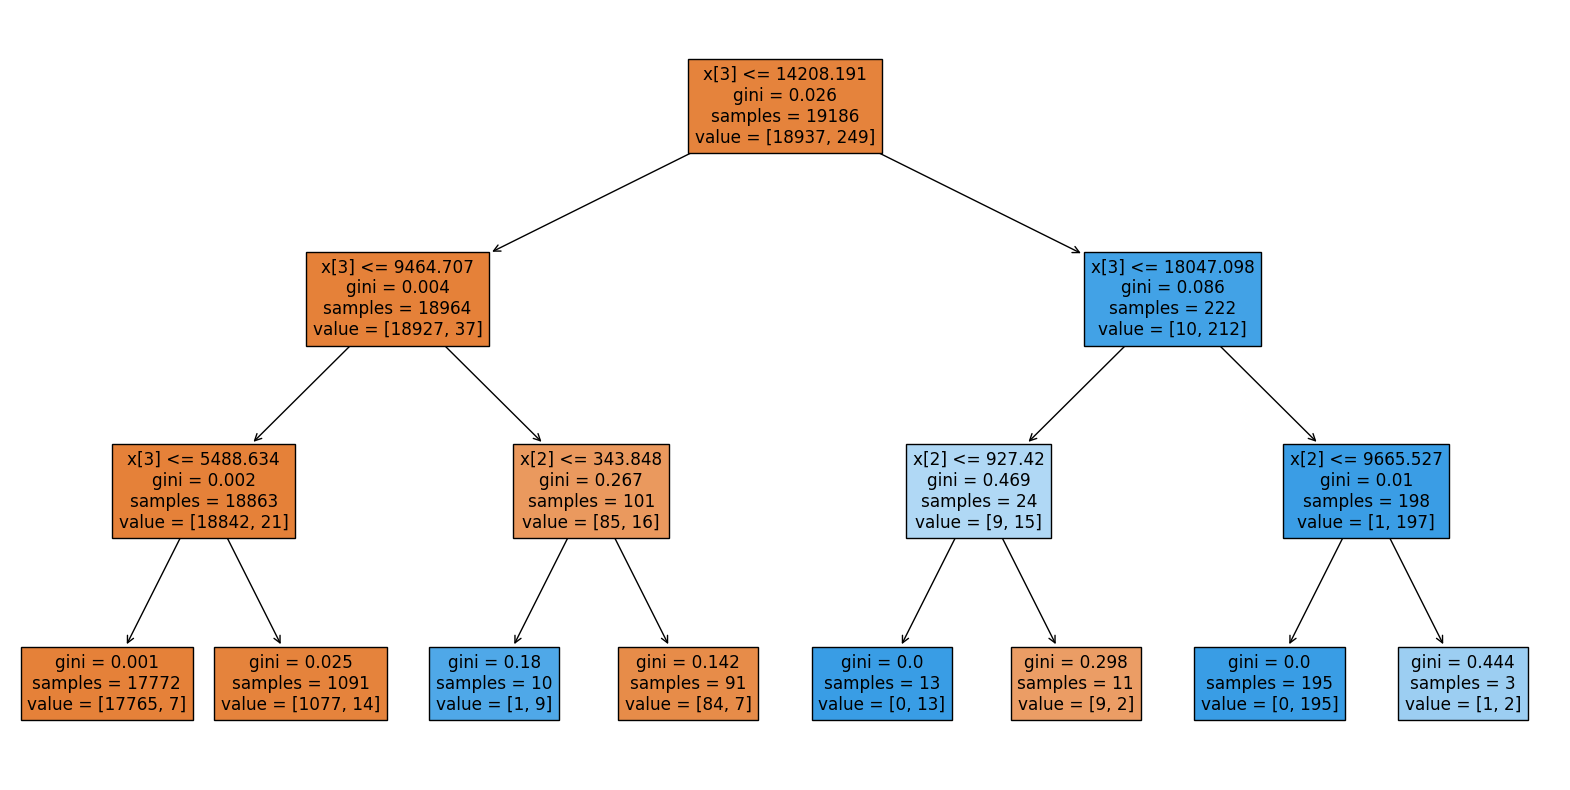

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()

Isolation Forest

In [91]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler()
# X_resampled, y_resampled = rus.fit_resample(X, y)

#I'll leave this here, since I tried undersampling to see if it'll still work okay - it does

data = X[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

model = EllipticEnvelope(contamination=0.01, support_fraction=1, assume_centered=False, random_state=47)
model.fit(scaled_data)

mahalanobis_dist = model.mahalanobis(data)
X['mahalanobis'] = mahalanobis_dist

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

iTree = IsolationForest(max_samples = 69, n_estimators = 1, random_state = 420, contamination=0.012)
iTree.fit(X_train)

y_pred = iTree.predict(X_test)
y_pred = (y_pred == -1).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4738    2]
 [  12   45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4740
           1       0.96      0.79      0.87        57

    accuracy                           1.00      4797
   macro avg       0.98      0.89      0.93      4797
weighted avg       1.00      1.00      1.00      4797



These results are fine as well, the Isolation forest algorithm is mostly used for anomaly detection, but I used it a lot in a previous project so I thought it might work well - it does.

This is how I did the hyperparameter optimization

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for j in range(1,20):
    for i in range(1,1200):
        iTree = IsolationForest(max_samples =i, n_estimators = j, random_state = 420, contamination=0.012, n_jobs=-1)
        iTree.fit(X_train)

        y_pred = iTree.predict(X_test)
        y_pred = (y_pred == -1).astype(int)
        print("max_samples={} and  n_estimators={} is f1={}".format(i, j,
                                                                    f1_score(y_test, y_pred)
                                                                    ))

Testing for silhouette score

In [86]:
features = ['CURRENT_BALANCE_EUR', 'CUST_INCOME']

cluster_data = retail_data[features]

scaler = StandardScaler()
cluster_data = scaler.fit_transform(cluster_data)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(cluster_data)
labels = kmeans.predict(cluster_data)
retail_data['y_pred'] = labels

from sklearn.metrics import silhouette_score

silhouette_coefficient = silhouette_score(cluster_data, labels)

print("Silhouette Coefficient: {:.2f}".format(silhouette_coefficient))


Silhouette Coefficient: 0.92


A Silhouette Coefficient of 0.92 indicates that the clustering is very good, with each data point being well matched to its own cluster and poorly matched to neighboring clusters. This suggests that the chosen clustering algorithm and hyperparameters are effective in identifying distinct groups within the data.

In [88]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.5238439241131121


An R-squared value of around 0.52 means that approximately 52% of the variance in the dependent variable can be explained by the independent variables in your model. This indicates a moderate level of predictive power of the model.

# Potential customers dataset
Because the dataset is unlabeled, we'll try to use Isolation Forest for the final output csv.

In [94]:
potential_customers = pd.read_csv('Potential Customers.csv', sep=';', header=0)

potential_customers['CUST_INCOME'] = potential_customers['CUST_INCOME'].str.replace(',', '.').astype(float)
potential_customers['CURRENT_BALANCE_EUR'] = potential_customers['CURRENT_BALANCE_EUR'].str.replace(',', '.').astype(float)

potential_customers['CURRENT_ADDRESS_DATE']  = potential_customers['CURRENT_ADDRESS_DATE'].replace('9999-10-01', '2030-01-01')
potential_customers['CURRENT_JOB_DATE']  = potential_customers['CURRENT_JOB_DATE'].replace('9999-10-01', '2030-01-01')
potential_customers['CURRENT_WITH_BANK_DATE']  = potential_customers['CURRENT_WITH_BANK_DATE'].replace('9999-10-01', '2030-01-01')

potential_customers['CURRENT_ADDRESS_DATE'] = pd.to_datetime(potential_customers['CURRENT_ADDRESS_DATE'])
potential_customers['CURRENT_JOB_DATE'] = pd.to_datetime(potential_customers['CURRENT_JOB_DATE'])
potential_customers['CURRENT_WITH_BANK_DATE'] = pd.to_datetime(potential_customers['CURRENT_WITH_BANK_DATE'])

In [95]:
potential_customers['EMPLOYMENT_STABILITY'] = round((pd.to_datetime(potential_customers['CURRENT_WITH_BANK_DATE']) - pd.to_datetime(potential_customers['CURRENT_JOB_DATE'])).dt.days / 365)
potential_customers = pd.get_dummies(potential_customers, columns=['GENDER', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT'])

X = potential_customers.drop(columns=['Cocunut','CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE', 'CURRENT_WITH_BANK_DATE'], axis=1)

In [96]:
data = X[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

model = EllipticEnvelope(contamination=0.01, support_fraction=1, assume_centered=False, random_state=47)
model.fit(scaled_data)

mahalanobis_dist = model.mahalanobis(data)
X['mahalanobis'] = mahalanobis_dist


In [111]:
iTree = IsolationForest(random_state = 420, contamination=0.012)
iTree.fit(X_test)

y_pred2 = iTree.predict(X.drop(columns=['EMPLOYMENT_TEA'], axis=1))
y_pred2 = (y_pred2 == -1).astype(int)

potential_customers['y_pred'] = y_pred2

In [112]:
potential_customers.to_csv("potential_customers with y_pred.csv")

Potential customers that should be approached

In [113]:
df = pd.DataFrame(potential_customers[potential_customers['y_pred'] == 1]) 
df.head(20)

,Cocunut,AGE,YEARS_WITH_BANK,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR,EMPLOYMENT_STABILITY,GENDER_F,...,EDUCATION_PRI,EDUCATION_PRS,EDUCATION_SEC,EMPLOYMENT_OTH,EMPLOYMENT_PVE,EMPLOYMENT_RET,EMPLOYMENT_SFE,EMPLOYMENT_STE,EMPLOYMENT_TEA,y_pred
1,80002,51,10,140.610231,2010-10-23,2030-01-01,2007-02-21,2288.700154,-23.0,1,...,0,0,1,0,0,1,0,0,0,1
66,80067,68,8,376.926769,1981-08-20,2030-01-01,2009-02-23,4742.307692,-21.0,1,...,0,0,1,0,0,1,0,0,0,1
304,80305,57,11,242.906539,1991-01-07,1986-11-24,2006-06-12,1900.044615,20.0,1,...,0,1,0,0,0,0,0,1,0,1
389,80390,59,2,749.982461,1989-05-01,1989-06-26,2014-08-28,7692.307692,25.0,0,...,0,0,0,0,0,0,0,1,0,1
951,80952,49,13,848.453846,1988-02-01,2009-12-01,2004-01-10,13672.184620,-6.0,1,...,0,0,0,0,0,0,0,1,0,1
1448,81449,66,3,214.572615,2012-03-20,2030-01-01,2013-07-12,4979.423077,-16.0,0,...,0,0,0,0,0,1,0,0,0,1
1582,81583,54,13,0.000000,2030-01-01,2030-01-01,2003-07-14,2307.692308,-26.0,0,...,0,0,1,1,0,0,0,0,0,1
1706,81707,64,7,314.385615,2004-11-08,1979-01-06,2010-04-12,4384.615385,31.0,0,...,0,0,0,0,0,0,0,1,0,1
1809,81810,53,14,394.400000,1996-05-01,1996-09-02,2003-06-26,11538.461540,7.0,1,...,0,0,0,0,0,0,0,1,0,1
1861,81862,65,3,843.747539,2011-05-01,2030-01-01,2014-06-04,10022.874540,-16.0,0,...,0,0,0,0,0,1,0,0,0,1


In [114]:
import shap
explainer = shap.Explainer(iTree.predict, X.drop(columns=['EMPLOYMENT_TEA'], axis=1))
shap_values = explainer(X.drop(columns=['EMPLOYMENT_TEA'], axis=1))

Permutation explainer: 2748it [25:42,  1.77it/s]                          


In [115]:
shap.initjs()

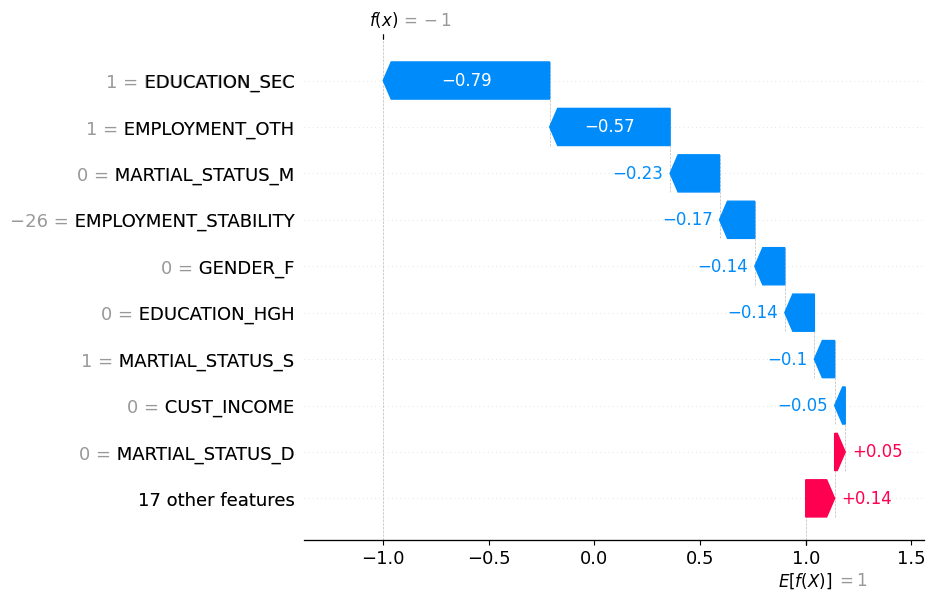

In [122]:
shap.plots.waterfall(shap_values[1582])

In [23]:
retail_data_test = pd.read_csv("Retail data.csv", sep=';', header=0)
a = pd.DataFrame()
a['zarada_blanko'] = retail_data_test['CUST_INCOME'].str.replace(',', '').astype(float)
a['zarada_tacka']  = retail_data['CUST_INCOME']


a['balans_blanko'] = retail_data_test['CURRENT_BALANCE_EUR'].str.replace(',', '').astype(float)
a['balans_tacka'] = retail_data['CURRENT_BALANCE_EUR']

corr = a.corr()

In [25]:
print(corr)

               zarada_blanko  zarada_tacka  balans_blanko  balans_tacka
zarada_blanko       1.000000      0.228809       0.035530      0.088226
zarada_tacka        0.228809      1.000000       0.010875      0.259030
balans_blanko       0.035530      0.010875       1.000000      0.146710
balans_tacka        0.088226      0.259030       0.146710      1.000000


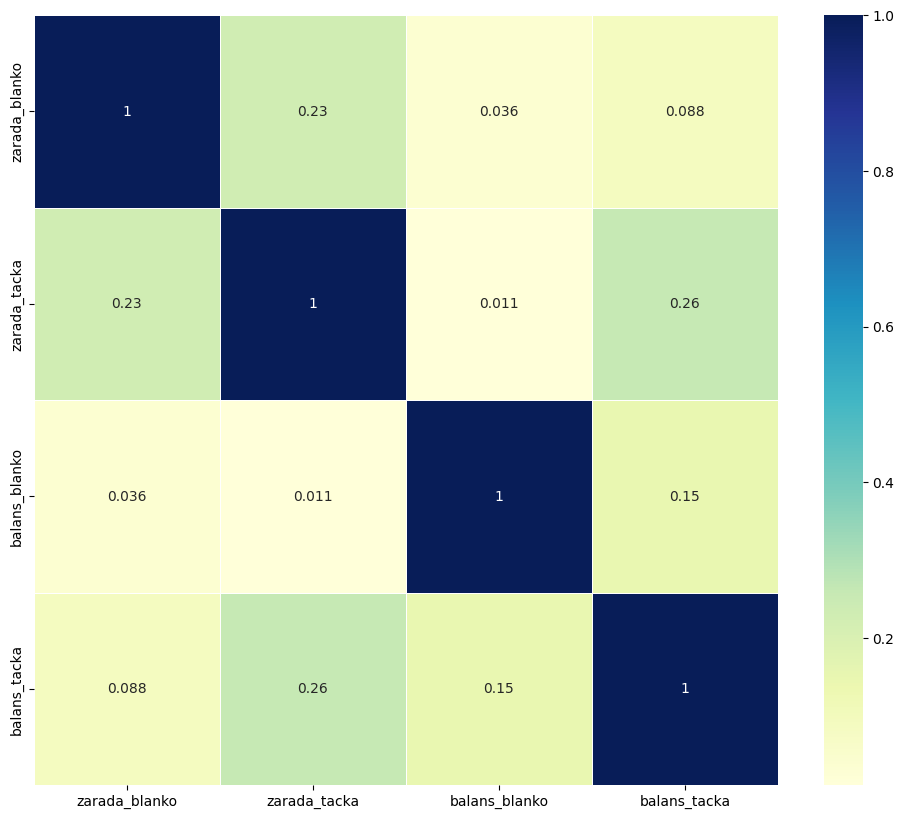

In [24]:
fix, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=0.5)

plt.show()